# Homework 1 - Solutions
### Prepared by: Laurent Lessard

## 1. Warm up
Model the following problem in JuMP. 

$$\begin{aligned}
\text{maximize}\qquad& 5x_1 − x_2 + 11x_3\\
\text{subject to:}\qquad& 2x_1 \ge x_2 + x_3 \\
& 0 \le x_j \le 3, \ \ j=1,...,3
\end{aligned}$$

Solve this problem using Clp, ECOS, and SCS. Compare the answers found by each solver.

In [8]:
using JuMP
function solveLP(solver)
    m = Model(solver=solver)
    @variable(m, 0 <= x[1:3] <= 3)
    @constraint(m, 2x[1] >= x[2] + x[3] )
    @objective(m, Max, 5x[1] - x[2] + 11x[3] )
    status = solve(m)
    println()
    println("SOLVER: ", m.solver)
    println("STATUS: ", status)
    for i = 1:3
        println("x[", i, "] = ", getvalue(x[i]) )
    end
    println("objective = ", getobjectivevalue(m) )
end;

In [11]:
using Clp, ECOS, SCS
for solver in [ ClpSolver(), ECOSSolver(), SCSSolver() ]
    @time solveLP(solver)
end


SOLVER: Clp.ClpMathProgSolverInterface.ClpSolver(Any[])
STATUS: Optimal
x[1] = 3.0
x[2] = 0.0
x[3] = 3.0
objective = 48.0
  0.002144 seconds (639 allocations: 32.375 KB)

SOLVER: ECOS.ECOSSolver(Any[])
STATUS: Optimal
x[1] = 2.999999998571697
x[2] = 8.223270011736391e-9
x[3] = 3.0000000001977236
objective = 47.999999986810174
  0.114595 seconds (1.54 k allocations: 110.750 KB)

SOLVER: SCS.SCSSolver(Any[])
STATUS: Optimal
x[1] = 2.999985652990818
x[2] = 4.149724928776938e-6
x[3] = 3.0000130627112176
objective = 48.00006780505256
  0.337513 seconds (1.39 k allocations: 100.984 KB)


**Comments:** the most accurate solver is Clp, because it is a dedicated LP solver. The other two solvers are less accurate (and slower) because they are using more general algorithms that are less specialized and more boradly applicable.

---
## 2. Standard form with equality constraints

Rather than using the standard LP form we saw in class, some prefer using a form where all variables are nonnegative, all constraints are equality constraints, and the cost function is a minimization. So a general LP would look like:

$$\begin{aligned}
\text{minimize} \qquad& c^Tx \\
\text{subject to:} \qquad& Ax = b \\
& x \ge 0\\
\end{aligned}$$

Consider the following LP:
$$\begin{aligned}
\text{maximize} \qquad& 3z_1 - z_2 \\
\text{subject to:} \qquad& -z_1 + 6z_2 - z_3 + z_4 \ge -3\\
& 7z_2 + z_4 = 5 \\
& z_3 + z_4 \le 2 \\
& -1 \le z_2 \le 5,\quad -1 \le z_3 \le 5,\quad -2 \le z_2 \le 2
\end{aligned}$$

**a)** Transform the above LP into the equality-constrained standard form of (1). What are A, b, c,
and x? Be sure to explain how the decision variables of your transformed LP relate to those of
the original LP 

**b)** Solve both versions of the LP using JuMP and show that you can recover the optimal z and
objective value by solving your transformed version of the LP.

We have omitted the details for part a. The solution to part b is given below.

In [5]:
# Solution of the original problem

using JuMP
m = Model()

@variable(m, z[1:4] )
@constraints(m, begin
    -1 <= z[2] <= 5
    -1 <= z[3] <= 5
    -2 <= z[4] <= 2
    -z[1] + 6z[2] - z[3] + z[4] >= -3
    z[3] + z[4] <= 2
    7z[2] + z[4] == 5
end)
@objective(m, Max, 3z[1] - z[2])

status = solve(m)
println(m)
println(status)
println()
for i = 1:4
    println("z[", i, "] = ", getvalue(z[i]) )
end
println("objective = ", getobjectivevalue(m) )

Max 3 z[1] - z[2]
Subject to
 -1 <= z[2] <= 5
 -1 <= z[3] <= 5
 -2 <= z[4] <= 2
 -z[1] + 6 z[2] - z[3] + z[4] >= -3
 z[3] + z[4] <= 2
 7 z[2] + z[4] == 5
 z[i] free for all i in {1,2,3,4}

Optimal

z[1] = 8.571428571428571
z[2] = 0.42857142857142855
z[3] = -1.0
z[4] = 2.0
objective = 25.28571428571429


In [6]:
# Solution of the new version of the problem

using JuMP
m = Model()

@variable(m, x[1:9] >= 0 )
@constraints(m, begin
    x[4] + x[5] == 6
    x[2] + x[3] == 6
    x[6] + x[7] == 4
    x[1]-5x[2]+x[3]+(5/6)x[4]-(1/6)x[5]-(1/2)x[6]+(1/2)x[7]+x[8] == 3
    (35/6)x[2]-(7/6)x[3]+(1/2)x[6]-(1/2)x[7] == 5
    (5/6)x[4]-(1/6)x[5]+(1/2)x[6]-(1/2)x[7]+x[9] == 2
end)
@objective(m, Min, -3x[1] + (5/6)x[2] - (1/6)x[3] )

status = solve(m)
println(m)
println(status)
println()
println("z[1] = ", getvalue( x[1] ))
println("z[2] = ", getvalue( (5/6)x[2] - (1/6)x[3]) )
println("z[3] = ", getvalue( (5/6)x[4] - (1/6)x[5]) )
println("z[4] = ", getvalue( (1/2)x[6] - (1/2)x[7]) )
println("objective = ", -getobjectivevalue(m) )

Min -3 x[1] + 0.8333333333333333 x[2] - 0.16666666666666666 x[3]
Subject to
 x[4] + x[5] == 6
 x[2] + x[3] == 6
 x[6] + x[7] == 4
 x[1] - 5 x[2] + x[3] + 0.8333333333333333 x[4] - 0.16666666666666666 x[5] - 0.5 x[6] + 0.5 x[7] + x[8] == 3
 5.833333333333333 x[2] - 1.1666666666666665 x[3] + 0.5 x[6] - 0.5 x[7] == 5
 0.8333333333333333 x[4] - 0.16666666666666666 x[5] + 0.5 x[6] - 0.5 x[7] + x[9] == 2
 x[i] >= 0 for all i in {1,2,..,8,9}

Optimal

z[1] = 8.571428571428571
z[2] = 0.4285714285714286
z[3] = -1.0
z[4] = 2.0
objective = 25.28571428571429


In [7]:
# Solution of the new version of the problem (condensed form)

using JuMP
m = Model()

@variable(m, x[1:9] >= 0 )

A = [ 0   0    0    1    1    0    0    0    0
      0   1    1    0    0    0    0    0    0
      0   0    0    0    0    1    1    0    0
      1  -5    1   5/6 -1/6 -1/2  1/2   1    0
      0  35/6 -7/6  0    0   1/2 -1/2   0    0
      0   0    0   5/6 -1/6  1/2 -1/2   0    1 ]

b = [ 6; 6; 4; 3; 5; 2 ]

c = [ -3; 5/6; -1/6; 0; 0; 0; 0; 0; 0 ]

@constraint(m, A*x .== b)
@objective(m, Min, dot(c,x))

status = solve(m)
println(m)
println(status)
println()
println("z[1] = ", getvalue( x[1]) )
println("z[2] = ", getvalue( (5/6)x[2] - (1/6)x[3]) )
println("z[3] = ", getvalue( (5/6)x[4] - (1/6)x[5]) )
println("z[4] = ", getvalue( (1/2)x[6] - (1/2)x[7]) )
println("objective = ", -getobjectivevalue(m) )

Min -3 x[1] + 0.8333333333333334 x[2] - 0.16666666666666666 x[3]
Subject to
 x[4] + x[5] == 6
 x[2] + x[3] == 6
 x[6] + x[7] == 4
 x[1] - 5 x[2] + x[3] + 0.8333333333333334 x[4] - 0.16666666666666666 x[5] - 0.5 x[6] + 0.5 x[7] + x[8] == 3
 5.833333333333333 x[2] - 1.1666666666666667 x[3] + 0.5 x[6] - 0.5 x[7] == 5
 0.8333333333333334 x[4] - 0.16666666666666666 x[5] + 0.5 x[6] - 0.5 x[7] + x[9] == 2
 x[i] >= 0 for all i in {1,2,..,8,9}

Optimal

z[1] = 8.571428571428571
z[2] = 0.4285714285714286
z[3] = -1.0
z[4] = 2.0
objective = 25.28571428571429


---
## 3. Crop planning

Farmer Jane owns 45 acres of land. She is going to plant each with wheat or corn. Each acre planted with wheat yields \$200 profit; each with corn yields \$300 profit. The labor and fertilizer used for each acre are given in the table below. One hundred workers and 120 tons of fertilizer are available. How should Jane plant her crops to maximize profits from her land?

|            | Wheat     | Corn      |
|------------|-----------|-----------|
| Labor      | 3 workers | 2 workers |
| Fertilizer | 2 tons    | 4 tons    |

In [3]:
using JuMP

m = Model()

@variable(m, wheat >= 0)    # acres of wheat planted
@variable(m, corn  >= 0)    # acres of corn planted
@constraint(m, wheat + corn <= 45 )        # acreage budget
@constraint(m, 3*wheat + 2*corn <= 100 )   # labor budget
@constraint(m, 2*wheat + 4*corn <= 120 )   # fertilizer budget
@objective(m, Max, 200*wheat + 300*corn )  # maximize profit

solve(m)
println("acres of wheat planted: ", getvalue(wheat))
println("acres of corn planted:  ", getvalue(corn))
println("total profit: \$", getobjectivevalue(m))

acres of wheat planted: 19.99999999999999
acres of corn planted:  20.000000000000007
total profit: $10000.0


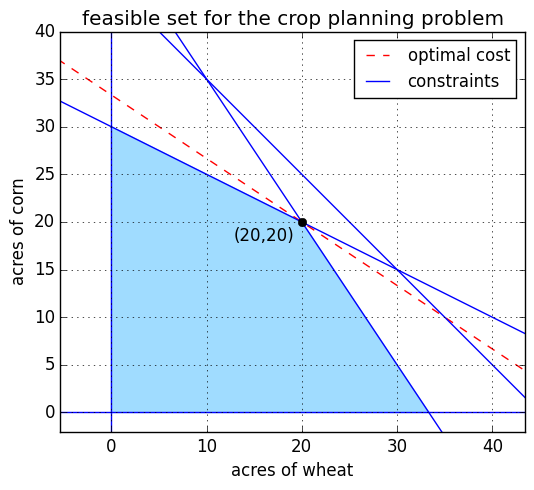

In [7]:
# here is PyPlot code that plots the region and shows the optimal value
using PyPlot
figure(figsize=(6,5))

# express each constraint as corn = f(wheat)
w = linspace(-10,80,3)
plot( w, (10000-200*w)/300, "r--")     # cost (200w + 300c = 10000)
plot( w, 0*w, "b-" )                   # c = 0
plot( 0*w, w, "b-" )                   # w = 0
plot( w, (100 - 3*w)/2, "b-")          # 3w + 2c = 100
plot( w, (120 - 2*w)/4, "b-")          # 2w + 4c = 120
plot( w, 45-w, "b-")                   # w + c = 45
plot( 20, 20, "k.", markersize=12)     # optimal point (20,20)
text( 13, 18, "(20,20)")
fill( [0, 0, 20, 100/3, 0], [0, 30, 20, 0, 0], color=(160/255,220/255,255/255) )
grid(); axis("equal"); axis([-2,40,-2,40]); 
xlabel("acres of wheat");  ylabel("acres of corn")
legend(["optimal cost", "constraints"],fontsize=12)
title("feasible set for the crop planning problem");

---
## 4. Alloy blending

The company Steelco has received an order for 500 tonnes of steel to be used in shipbuilding.  The steel must have the following charactersitics:

| Chemical Element | Minimum Grade | Maximum Grade |
|------------------|---------------|---------------|
| Carbon (C)       | 2             | 3             |
| Copper (Cu)      | 0.4           | 0.6           |
| Manganese (Mn)   | 1.2           | 1.65          |

The company has seven different raw materials in stock that may be used for the production of this steel. The following table lists the grades, available amounts and prices for all materials:

| Raw Material | C%     | Cu%    | Mn%    | Availability in t | Cost in $/t  |
|--------------|--------|--------|--------|-------------------|--------------|
| Iron1        | 2.5    | 0      | 1.3    | 400               | 200          |
| Iron2        | 3      | 0      | 0.8    | 300               | 250          |
| Iron3        | 0      | 0.3    | 0      | 600               | 150          |
| Cu1          | 0      | 90     | 0      | 500               | 220          |
| Cu2          | 0      | 96     | 4      | 200               | 240          |
| Al1          | 0      | 0.4    | 1.2    | 300               | 200          |
| Al2          | 0      | 0.6    | 0      | 250               | 165          |

The objective is to determine the composition of the steel that minimizes the production cost.

In [12]:
# store all the data for the problem

raw = [ :iron1, :iron2, :iron3, :cu1, :cu2, :al1, :al2 ]

# composition (in percent) of [C, Cu, Mn]
composition = Dict(
:iron1 => [2.5, 0,  1.3],
:iron2 => [3,   0,  0.8],
:iron3 => [0,  0.3,  0 ],
:cu1   => [0,  90,   0 ],
:cu2   => [0,  96,   4 ],
:al1   => [0,  0.4, 1.2],
:al2   => [0,  0.6,  0 ])

# availability in tonnes
availability = Dict(
:iron1 => 400,
:iron2 => 300,
:iron3 => 600,
:cu1   => 500,
:cu2   => 200,
:al1   => 300,
:al2   => 250)

# cost in dollars per tonne
cost = Dict(
:iron1 => 200,
:iron2 => 250,
:iron3 => 150,
:cu1   => 220,
:cu2   => 240,
:al1   => 200,
:al2   => 165)

# minimum and maximum grade of [C, Cu, Mn]
MinGrade = [2, 0.4, 1.2]
MaxGrade = [3, 0.6, 1.65]
;

In [16]:
using JuMP

m = Model()
@variable(m, use[raw] >= 0)   # amount of each raw material to use (in tonnes)
@expression(m, production, sum(use))
@constraint(m, avail[i in raw], use[i] <= availability[i])
@constraint(m, sum(composition[i]*use[i] for i in raw) .>= MinGrade*production)
@constraint(m, sum(composition[i]*use[i] for i in raw) .<= MaxGrade*production)
@constraint(m, production >= 500)
@objective(m, Min, sum(cost[i]*use[i] for i in raw))
solve(m)
println(getvalue(use))
println("The cost will be \$", getobjectivevalue(m))

use: 1 dimensions:
[iron1] = 400.0
[iron2] = 0.0
[iron3] = 39.77630199231041
[  cu1] = 0.0
[  cu2] = 2.7612722824187346
[  al1] = 57.46242572527083
[  al2] = 0.0

The cost will be $98121.63579168123
